# PROJET **CO2** - DataViz

**Ce document se concentre sur les graphiques(et leur analyse).  
Les justifications finales sur le preprocessing sont dans le Notebook "04_Prepa_Dataset"**  

Pour garder toutes les possibilités de DataViz, le dataset utilisé est le dataset initial brut "c02_fr&al_21_v02.csv"

# 1. Préparation et chargement des données

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [89]:
# Première lecture du DataSet complet fr&al_21

name = "c02_fr&al_21_v02.csv"        # 8 500 000 entries    
path = "./Dataset/"
df = pd.read_csv(path+name, low_memory=False)


In [61]:
# Gestion d'un dataset réduit  100 000 vehicules
# Dataset_reduit disponible dans le dossier data (pour tests de code).

path = "./Dataset/"

# with Pickle    (25Mo)
name = "c02_fr&al_21_v02_1e5.pkl" 
# dft = df.sample(100000, random_state=29)
# dft.to_pickle(path+name)
dft1 = pd.read_pickle(path+name)

# with CSV, (moins bien, remet l'index à 0)    (24Mo)
# name = "c02_fr&al_21_v02_1e5.csv" 
# dft = df.sample(100000, random_state=29)
# dft.to_csv(path+name, index = False)
# dft2 = pd.read_csv(path+name)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8517883 entries, 0 to 8517882
Data columns (total 38 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Country               object 
 2   VFN                   object 
 3   Mp                    object 
 4   Mh                    object 
 5   Man                   object 
 6   MMS                   float64
 7   Tan                   object 
 8   T                     object 
 9   Va                    object 
 10  Ve                    object 
 11  Mk                    object 
 12  Cn                    object 
 13  Ct                    object 
 14  Cr                    object 
 15  r                     int64  
 16  m (kg)                float64
 17  Mt                    float64
 18  Enedc (g/km)          float64
 19  Ewltp (g/km)          float64
 20  W (mm)                float64
 21  At1 (mm)              float64
 22  At2 (mm)              float64
 23  Ft     

In [92]:
# Renommage catégories

abbrev_list = [
    'ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va', 'Ve', 'Mk',
    'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)',
    'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT',
    'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
    'Fuel consumption ', 'Electric range (km)'
]

nom_colonne_list = [
    'ID', 'Country', 'VehicleFamilyIdentification', 'Pool', 'ManufacturerName', 'ManufNameOem',
    'Manuf_MS', 'TypeApprovalNumber', 'Type', 'Variant', 'Version', 'Make', 'CommercialName',
    'VehicleCategory', 'CategoryOf', 'TotalNewRegistrations', 'MassRunningOrder',
    'WltpTestMass', 'Co2_Nedc', 'Co2_Wltp',
    'BaseWheel', 'AxleWidthSteering', 'AxleWidthOther', 'FuelType', 'FuelMode',
    'EngineCapacity', 'EnginePower', 'ElectricConsumption',
    'InnovativeTechnology', 'InnovativeEmissionsReduction',
    'InnovativeEmissionsReductionWltp', 'DeviationFactor', 'VerificationFactor',
    'Status', 'RegistrationYear', 'RegistrationDate', 'FuelConsumption', 'ElectricRange'
]

# df1 = df
name_dict = dict(zip(abbrev_list, nom_colonne_list))
df.rename(name_dict, axis=1, inplace=True)


In [93]:
# Renaming fuel types for better understanding

df.loc[df['FuelType'] == 'petrol/electric', 'FuelType'] = 'PETROL/ELECTRIC'
df.loc[df['FuelType'] == 'E85', 'FuelType'] = 'ETHANOL'

df.loc[df['FuelType'] == 'NG-BIOMETHANE', 'FuelType'] = 'NATURALGAS'

df.loc[df['FuelType'] == 'petrol/electric', 'FuelType'] = 'PETROL/ELECTRIC'
df.loc[df['FuelType'] == 'E85', 'FuelType'] = 'ETHANOL'
df.loc[df['FuelType'] == 'NG-BIOMETHANE', 'FuelType'] = 'NATURALGAS'
df.loc[df['FuelType'] == 'NG', 'FuelType'] = 'NATURALGAS'

# Suppression des lignes FuelType = Unknow (peu de valeurs)
df = df[df['FuelType'] !='UNKNOWN']

print(df['FuelType'].value_counts())

FuelType
PETROL             4317963
DIESEL             1868840
ELECTRIC           1205156
PETROL/ELECTRIC     904203
LPG                 118374
DIESEL/ELECTRIC      53983
ETHANOL              41918
NATURALGAS            6360
HYDROGEN              1081
Name: count, dtype: int64


# 2. DataViz


### premières idées et propositions de graphiques

Etude par type d'energie:
- Proportions présentes dans l'echantillon -- > camebert
- Mise en relation avec polution moyenne --
- camembert pollution par energie

Matr de corrélation donc quels garphiques importants
(par energie)
- Etude par cm3
- Etude par masse

Etude par type d'energie:
- Proportions présentes dans l'echantillon
- Mise en relation avec polution moyenne
- camembert pollution par energie

Matr de corrélation donc quels garphiques importants
(par energie)
- Etude par cm3
- Etude par masse

Etude pollution totale par type d'energie + prop par type de d"energie (graph emboités)# Etude pollution totale par type d'energie + prop par type de d"energie (graph emboités)

Matrice Corrrel par classes (pollution/type energie)

Se poser la question de graphes par modele ?   
(Faire un tableau liste des modeles différents - df préparé dans cellule en fin de Notebook + refaire ce W sur ce tableau).

## 2.1. Correlation et Heatmap 

In [94]:
# Matrice de Correlation
cor = df[['Co2_Wltp','FuelConsumption','EnginePower','EngineCapacity', 'WltpTestMass','BaseWheel','AxleWidthSteering']].corr()
display(cor)

,Co2_Wltp,FuelConsumption,EnginePower,EngineCapacity,WltpTestMass,BaseWheel,AxleWidthSteering
Co2_Wltp,1.000000,0.843671,0.254143,0.325119,-0.096958,0.146301,0.157100
FuelConsumption,0.843671,1.000000,0.474322,0.352748,0.155258,0.214615,0.187864
EnginePower,0.254143,0.474322,1.000000,0.822956,0.656062,0.526353,0.598387
EngineCapacity,0.325119,0.352748,0.822956,1.000000,0.722433,0.560666,0.592139
WltpTestMass,-0.096958,0.155258,0.656062,0.722433,1.000000,0.808278,0.815968
BaseWheel,0.146301,0.214615,0.526353,0.560666,0.808278,1.000000,0.806834
AxleWidthSteering,0.157100,0.187864,0.598387,0.592139,0.815968,0.806834,1.000000


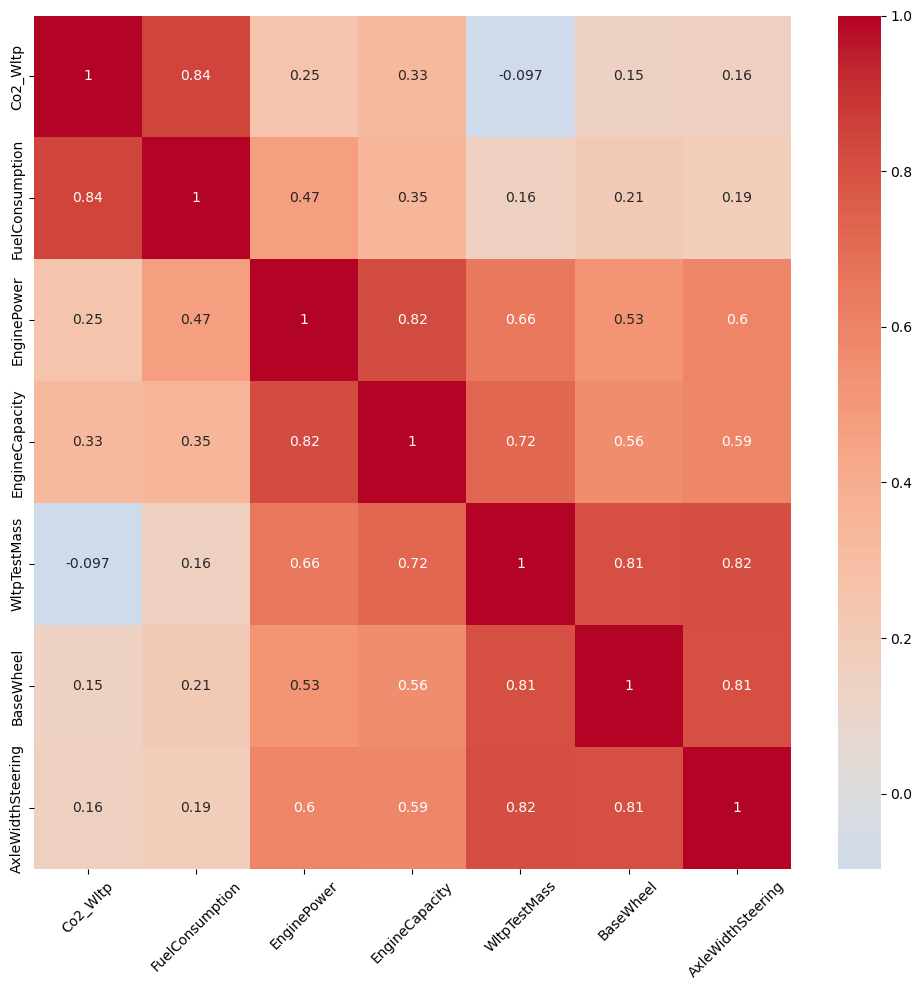

In [17]:
# Heatmap (version réduite)
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot = True, center=0, cmap = "coolwarm")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Premières conclusions:**



> Co2       non corrélé avec  BaseWheel, Axle, Engine capacity   -> Suprimer
BaseWheel, Axle, en première intention ?  
Co2       correl++ with    FuelConsumption  

> BaseWhell correl with      Axle                               -> Supr 1 des deux (Base car moins corrélé)
Mass      correl with      Axle, BaseWhell, EngineCapacity    -> Supr BaseWheel, Axle, en première intention ? (Et on garde Mass)


    
> MassRunningOrder     corre++ with     "WltpTestMass"           -> Supr 1 des deux (Voir ci dessous)




## 2.2 Distribution of numerical features

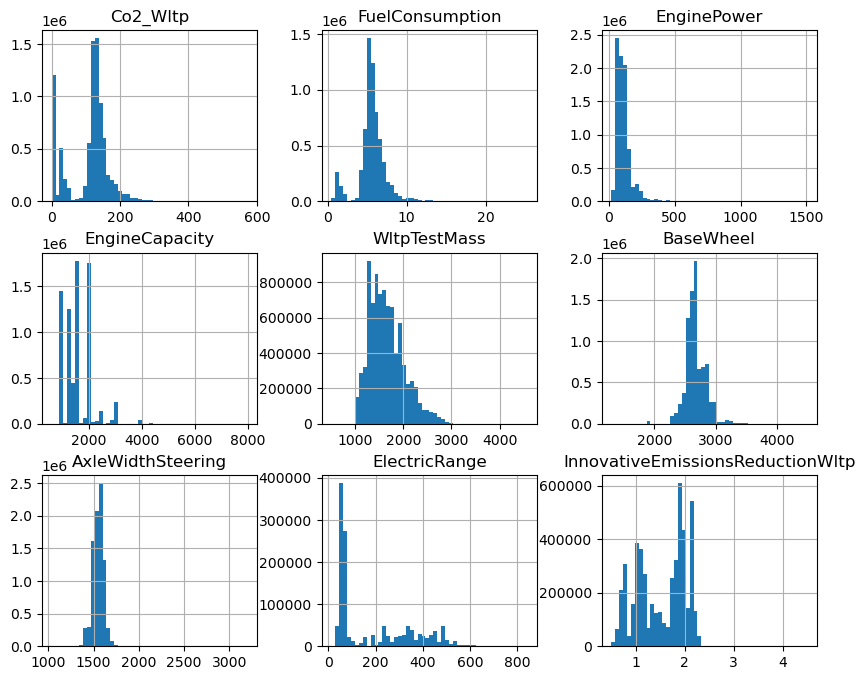

In [95]:
# Distribution of numerical features
df1 = df[['Co2_Wltp','FuelConsumption','EnginePower','EngineCapacity', 'WltpTestMass','BaseWheel', 'AxleWidthSteering', 'ElectricRange', 'InnovativeEmissionsReductionWltp']]
df1.hist(figsize=(10,8),bins=50);

## 2.3. Frequency distribution of different features

Nombre de holdings:  14



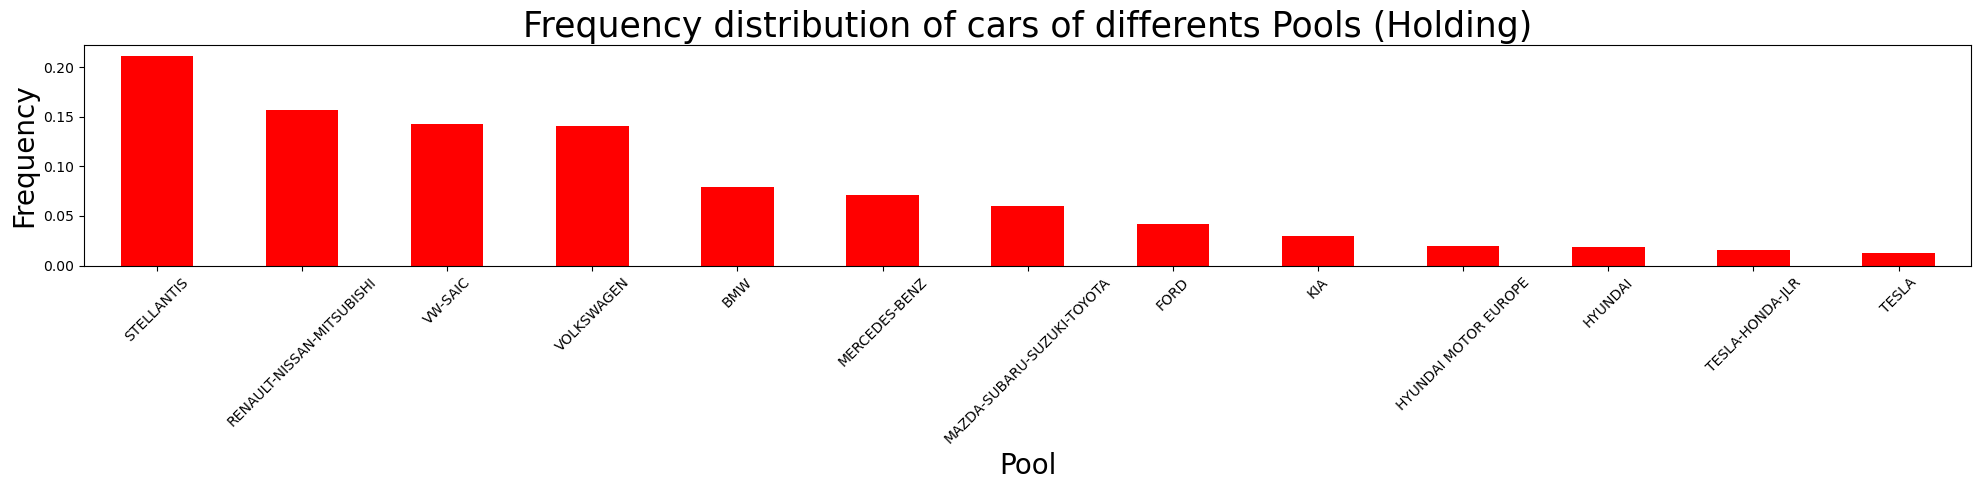

In [66]:
# POOL

# checking for unique variables
print("Nombre de holdings: ", len(df['Pool'].unique()))
print()

# Distribution
plt.figure(figsize=(20,5))
df['Pool'].value_counts(normalize = True).head(30).plot(kind='bar',color='red')
plt.title('Frequency distribution of cars of differents Pools (Holding)', fontsize=25)
plt.xlabel('Pool', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nombre de markes:  195



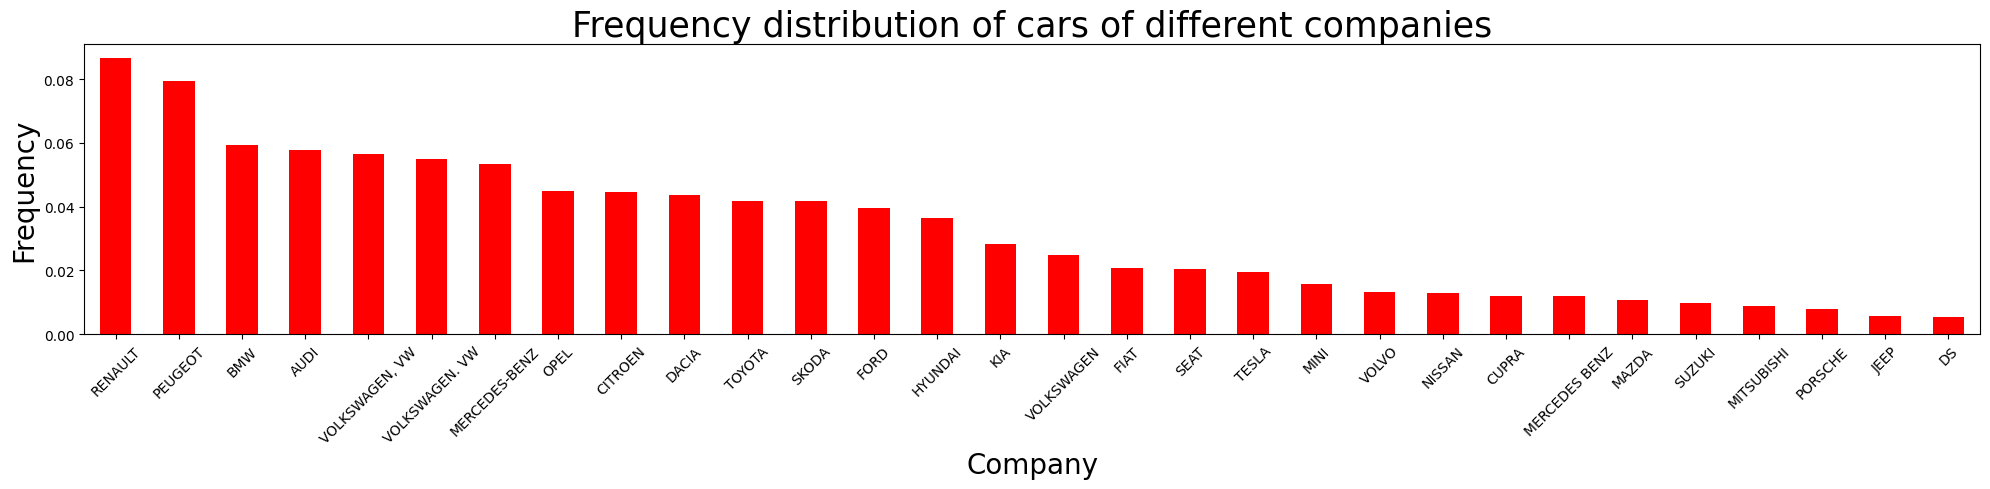

In [36]:
# MAKE

# checking for unique variables
print("Nombre de markes: ", len(df['Make'].unique()))
print()

# Distribution
plt.figure(figsize=(20,5))
df['Make'].value_counts(normalize = True).head(30).plot(kind='bar',color='red')
plt.title('Frequency distribution of cars of different companies', fontsize=25)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Nombre de modeles:  2679



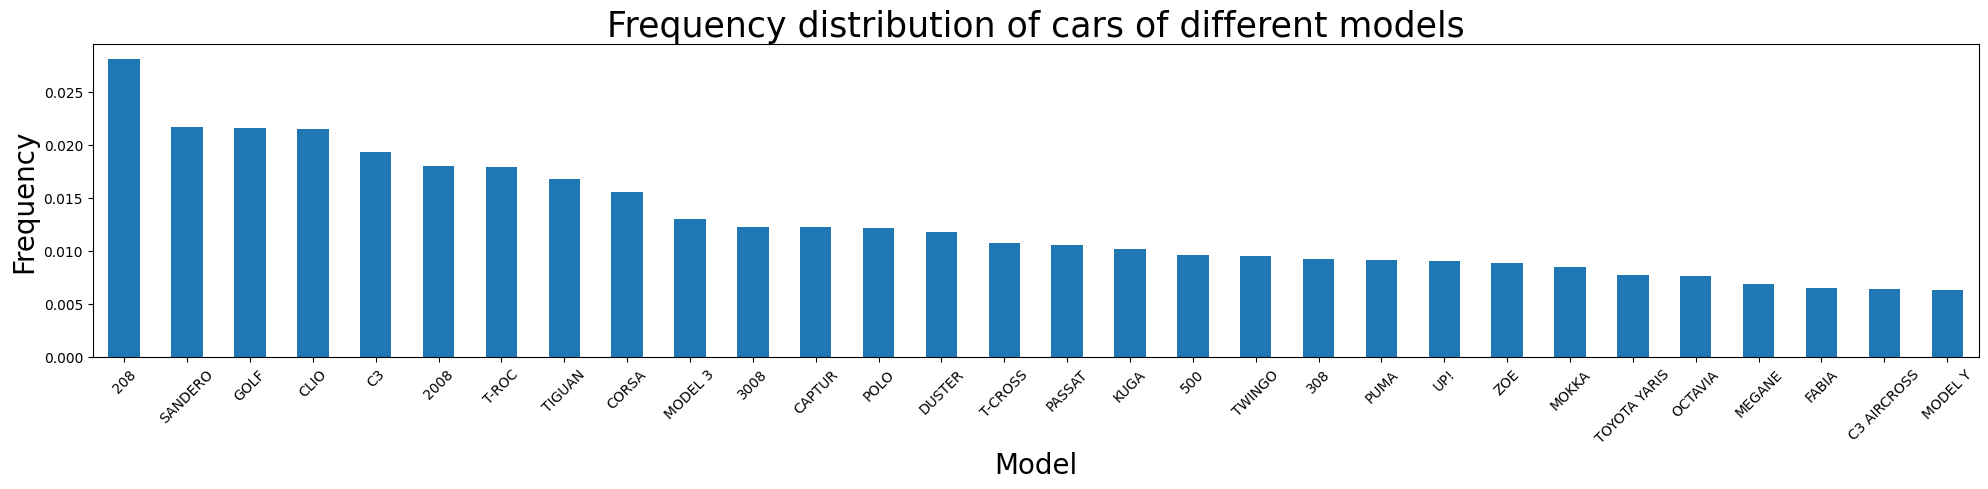

In [37]:
# CommercialName

# checking for unique variables
print("Nombre de modeles: ", len(df['CommercialName'].unique()))
print()

# Distribution
plt.figure(figsize=(20,5))
df['CommercialName'].value_counts(normalize = True).head(30).plot(kind='bar')
plt.title('Frequency distribution of cars of different models', fontsize=25)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

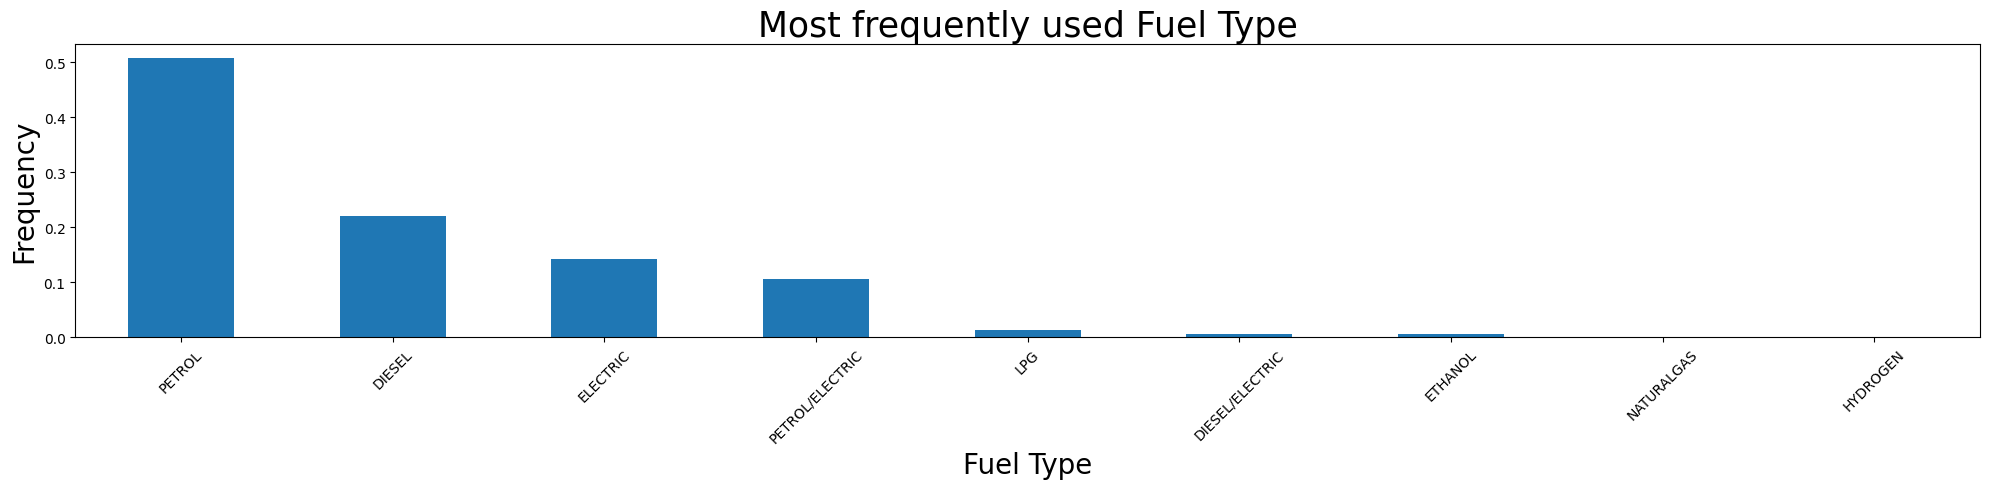

In [42]:
# Fuel Type

# Distribution
plt.figure(figsize=(20,5))
df['FuelType'].value_counts(normalize = True).head(30).plot(kind='bar')
plt.title('Most frequently used Fuel Type', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.4 Distribution des variables par rapport a l'émission de CO2

<Figure size 2000x500 with 0 Axes>

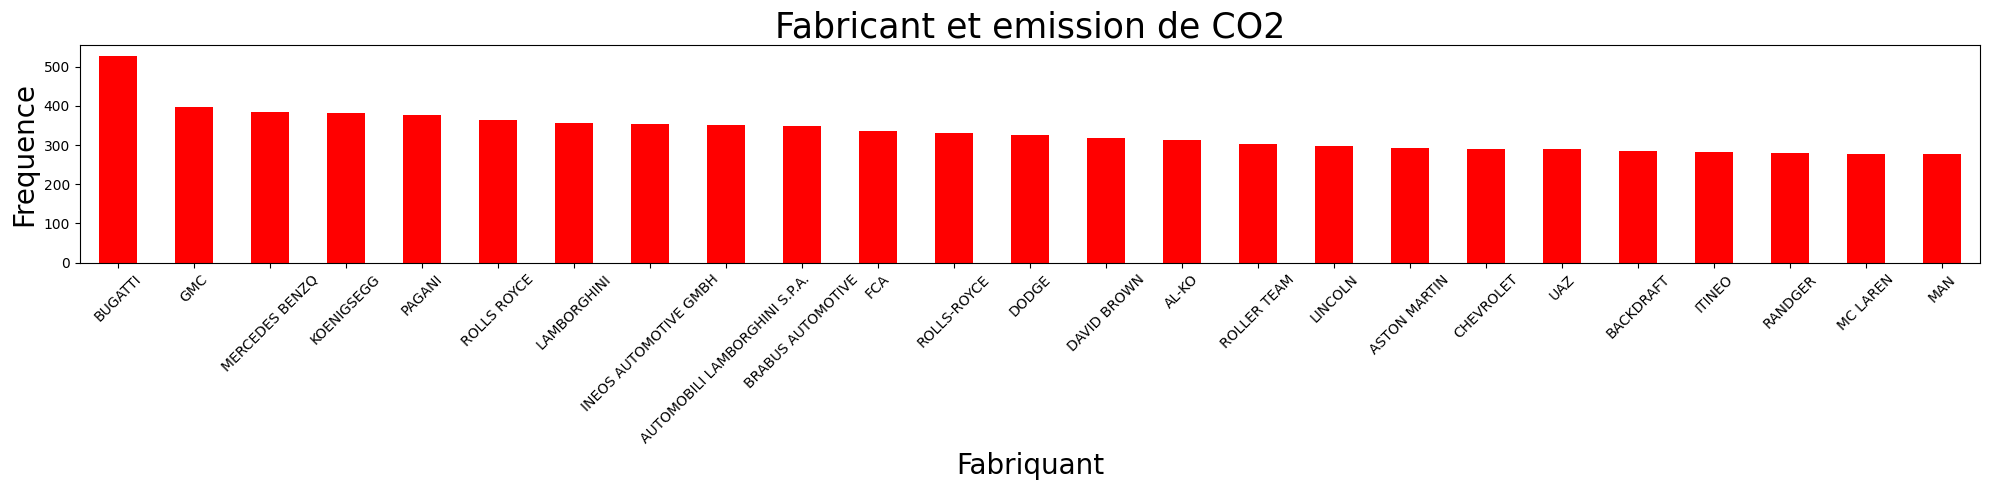

In [50]:
# Fabricant et emision de CO2

plt.figure(figsize=(20,5))

plt.figure(figsize=(20,5))
df.groupby('Make')['Co2_Wltp'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red')
plt.title('Fabricant et emission de CO2', fontsize=25)
plt.xlabel('Fabriquant', fontsize=20)
plt.ylabel('Frequence', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 2000x500 with 0 Axes>

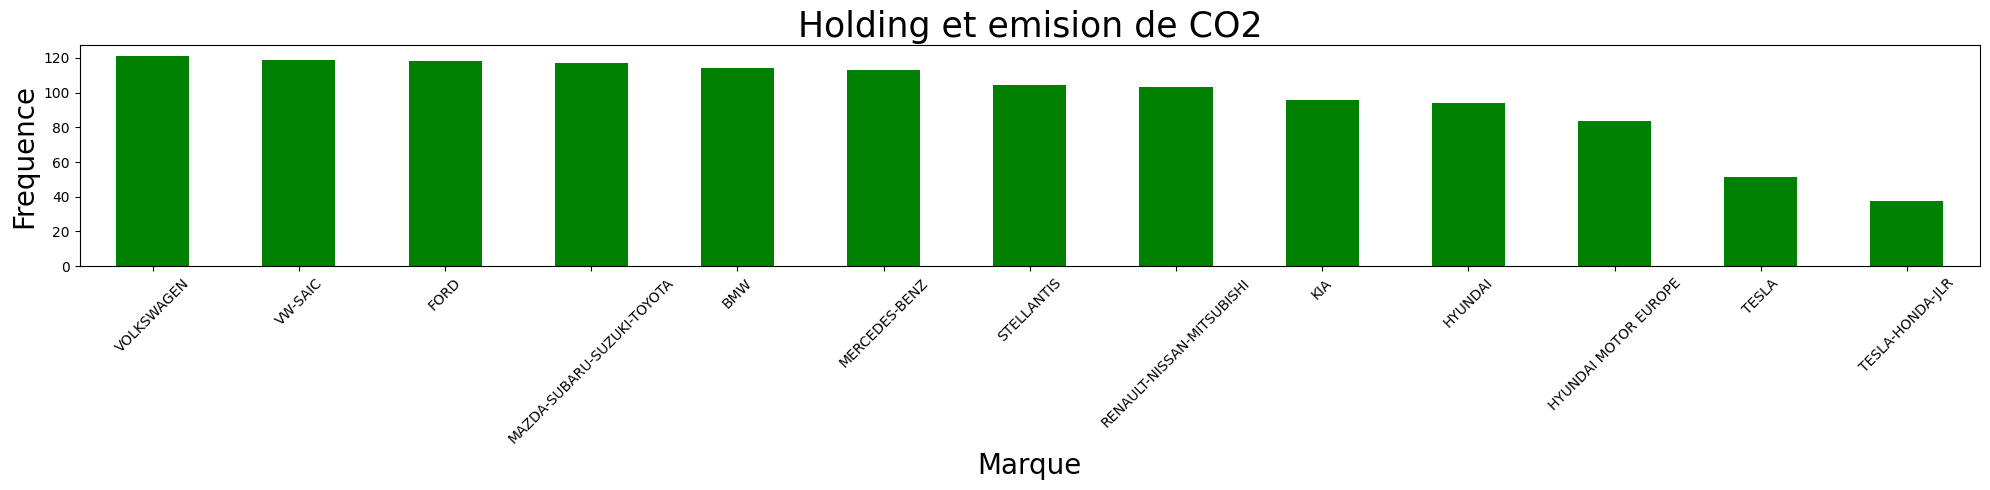

In [49]:
# Holding et emision de CO2

plt.figure(figsize=(20,5))

plt.figure(figsize=(20,5))
df.groupby('Pool')['Co2_Wltp'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='green')
plt.title('Holding et emision de CO2', fontsize=25)
plt.xlabel('Holding', fontsize=20)
plt.ylabel('Frequence', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 2000x500 with 0 Axes>

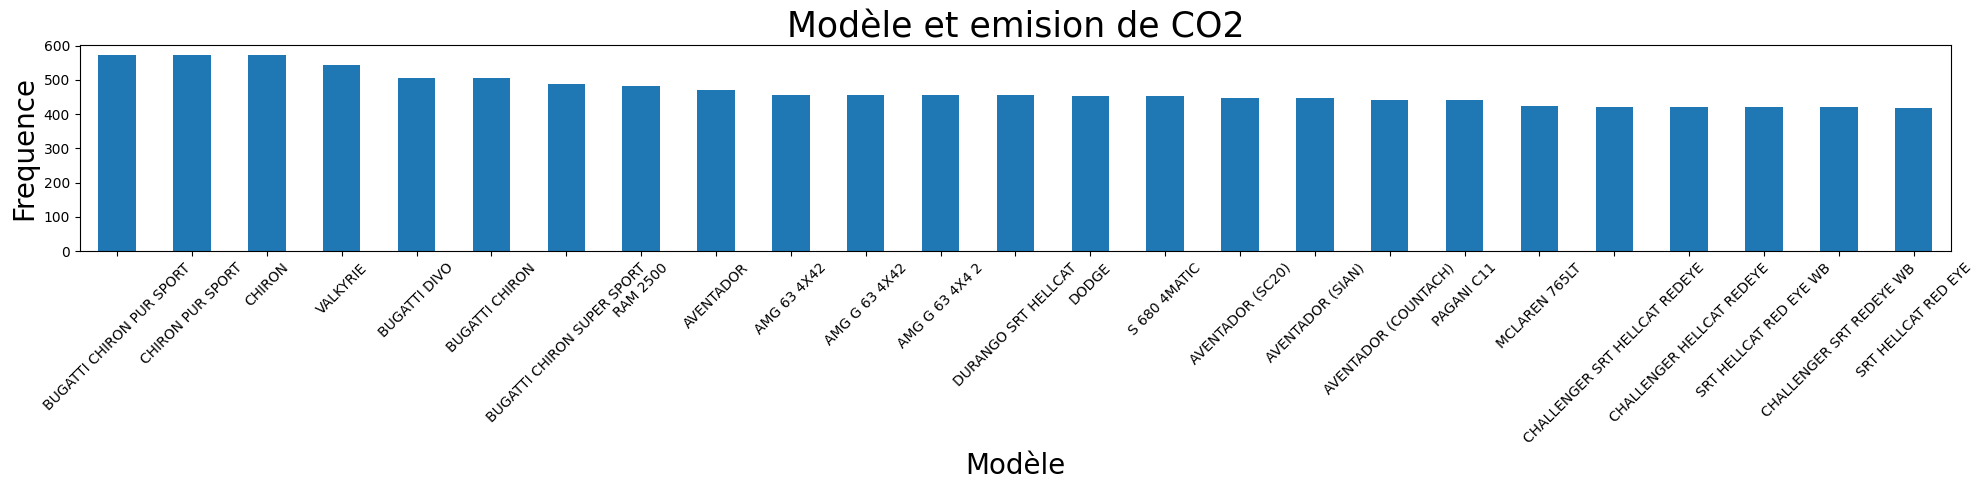

In [51]:
# Modele et émision de CO2

plt.figure(figsize=(20,5))

plt.figure(figsize=(20,5))
df.groupby('CommercialName')['Co2_Wltp'].mean().sort_values(ascending=False)[:25].plot(kind='bar')
plt.title('Modèle et emision de CO2', fontsize=25)
plt.xlabel('Modèle', fontsize=20)
plt.ylabel('Frequence', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 2000x500 with 0 Axes>

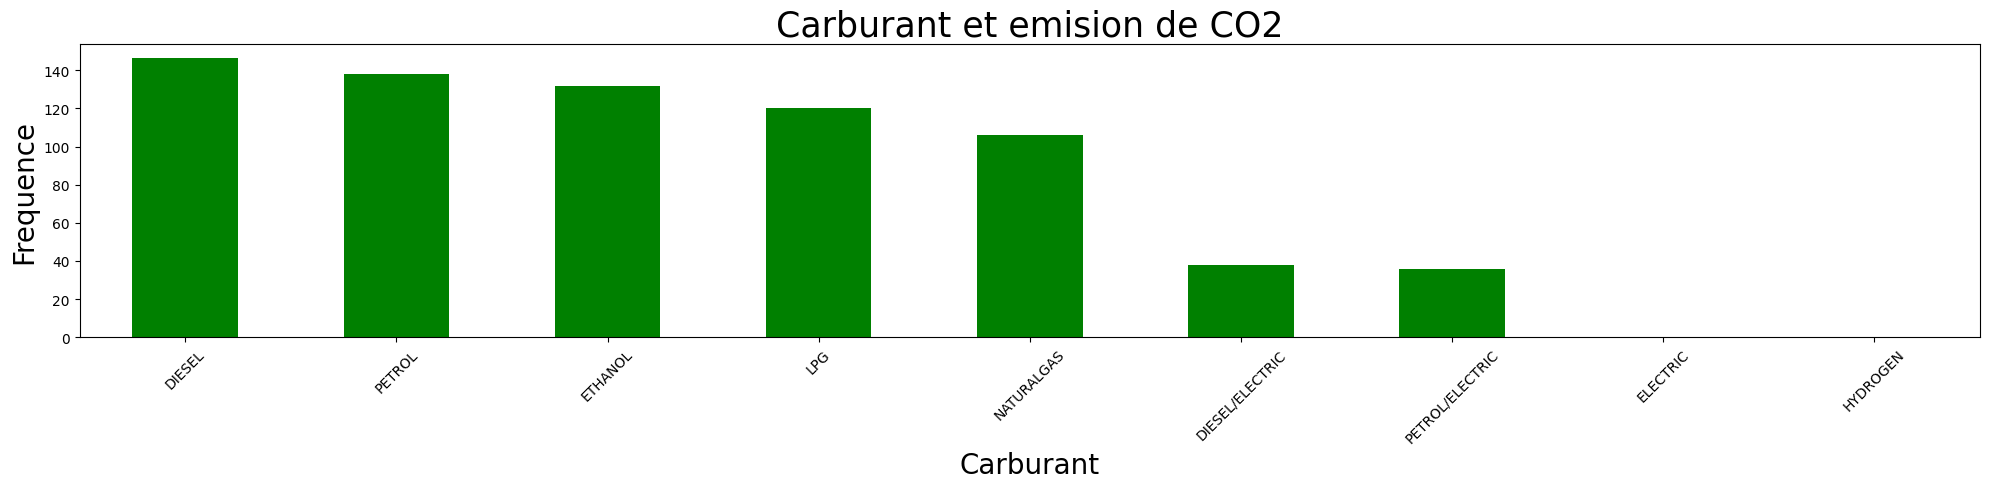

In [52]:
# Carburant et émision de CO2

plt.figure(figsize=(20,5))

plt.figure(figsize=(20,5))
df.groupby('FuelType')['Co2_Wltp'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color = 'green')
plt.title('Carburant et émision de CO2', fontsize=25)
plt.xlabel('Carburant', fontsize=20)
plt.ylabel('Frequence', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.5.  Relation CO2 / Masse, Puissance, Cylindrée

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


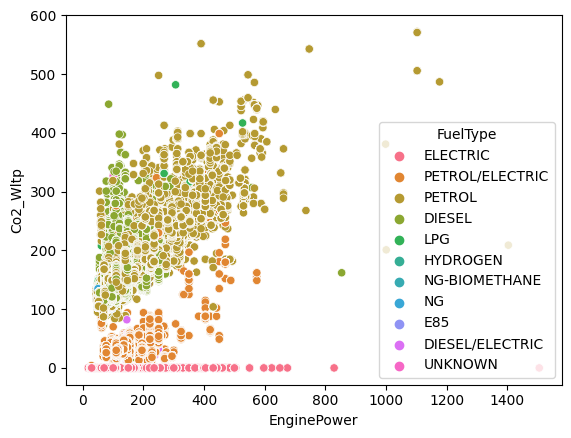

In [ ]:
### Scatterplot CO2 / Puissance (couleur = type d'energie) - Avec sns.scatterplot

sns.scatterplot(df, x = 'EnginePower', y = 'Co2_Wltp', hue='FuelType')
plt.show()

# A faire: Agrandir l'image, Regrouper les energies
# Long (20 min)

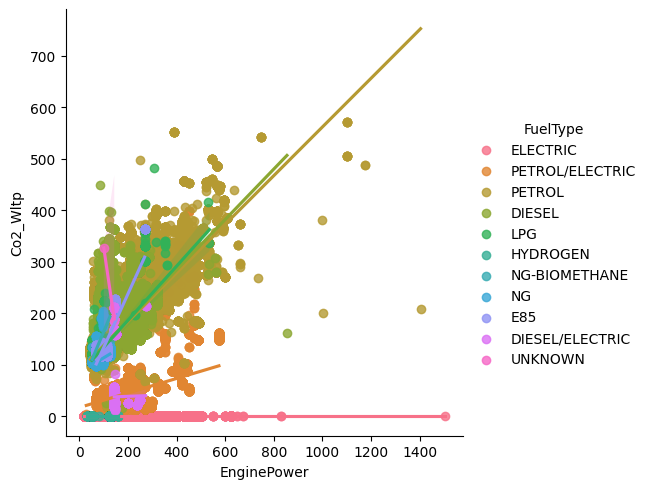

In [ ]:
### Scatterplot CO2 / Puissance (couleur = type d'energie) - Avec sns.lmplot

sns.lmplot(x = "EnginePower", y = "Co2_Wltp", hue='FuelType', data = df)  #Erreur avec lowess = True  line_kws = {'color': 'red'}

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


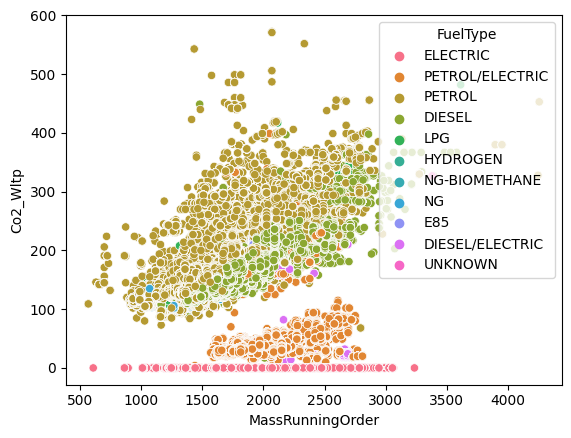

In [ ]:
### Scatterplot CO2 / Masse

sns.scatterplot(df, x = 'MassRunningOrder', y = 'Co2_Wltp', hue='FuelType')
plt.show()

# A faire: Agrandir l'image, Regrouper les energies
# Long (20 min)

<ipython-input-7-f5dab1a4cad4>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(x= "EnginePower", y="Co2_Wltp", cmap='Blues', alpha = 0.05, data = df)
<ipython-input-7-f5dab1a4cad4>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(x= "EngineCapacity", y="Co2_Wltp", cmap='Blues', alpha = 0.05, data = df)
<ipython-input-7-f5dab1a4cad4>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax3.scatter(x= "WltpTestMass", y="Co2_Wltp", cmap='Blues', alpha = 0.05, data = df)


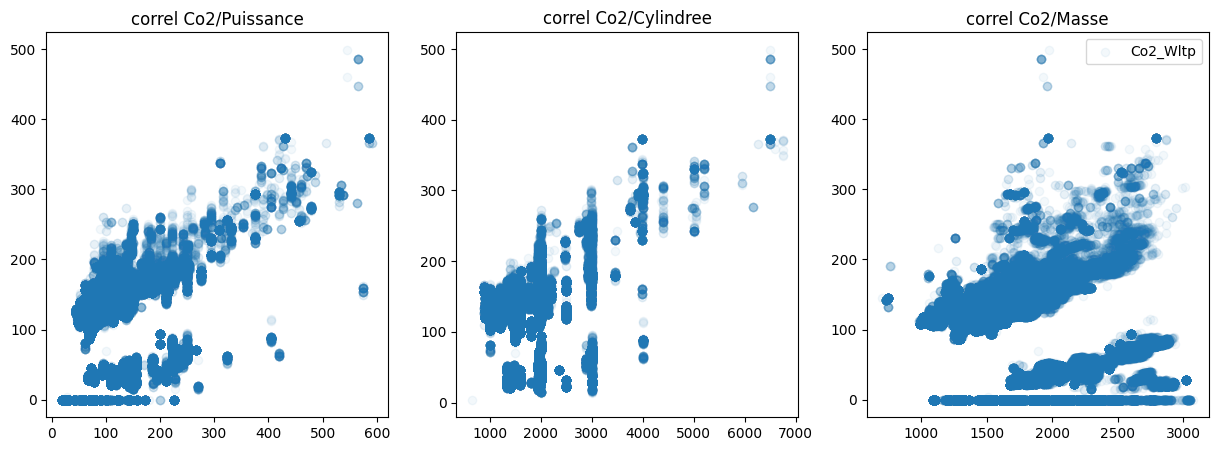

In [ ]:
### Relation CO2 / Masse, Puissance, Cylindrée

fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(x= "EnginePower", y="Co2_Wltp", alpha = 0.05, data = df)
ax1.set_title('correlation Co2 / '+'Puissance')
df_prov=df.dropna(axis=0, subset=['EngineCapacity'])
ax2.scatter(x= "EngineCapacity", y="Co2_Wltp", alpha = 0.05, data = df)
ax2.set_title('correlation Co2 / '+'Cylindree')
ax3.scatter(x= "WltpTestMass", y="Co2_Wltp", alpha = 0.05, data = df)
ax3.set_title('correlation Co2 / '+'Masse')
plt.legend()
plt.show();

# Voir si faisable en sns.scatter avec hue='FuelType' --> Lent

## 2.6. Répartition des véhicules par type d'energie

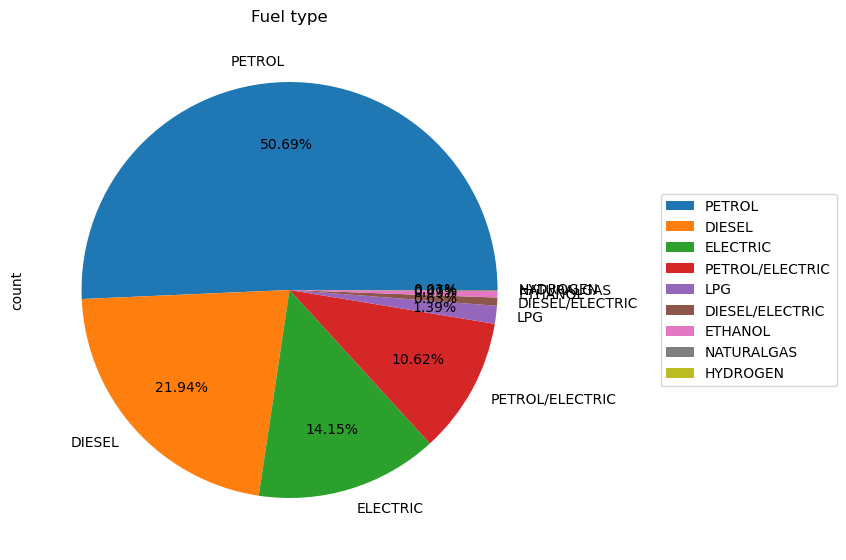

In [96]:
### Répartition des véhicules par type d'energie - Diagramme Secteurs

ax = df['FuelType'].value_counts().plot(kind='pie',  autopct = lambda x: str(round(x, 2)) + '%',pctdistance = 0.7, figsize=(8,8), title="Fuel type" )
ax.legend(bbox_to_anchor=(1.2, 0.5), loc='center left')
plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.1)

# Regler le probleme de chevauchement

In [ ]:
### Répartition des véhicules par type d'energie - Diagramme a barres

sns.catplot(
    data=df,
    x='FuelType',
    kind='count',
    height=5, # make the plot 5 units high
    aspect=3) # height should be three times width
plt.xticks(rotation=45, ha="right")

## 2.7. Distribution des voitures en fonction de leurs émissions de CO2

(0.0, 250.0)

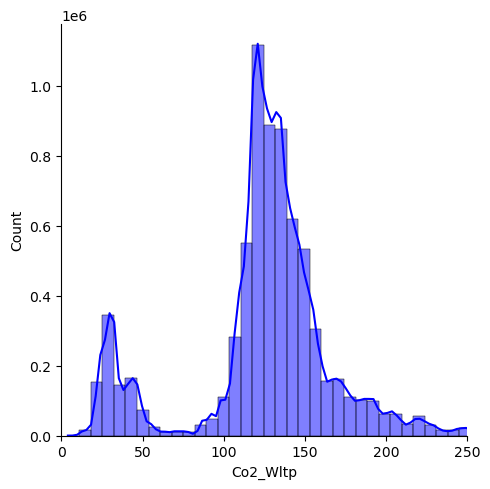

In [99]:
### Distributionn des voitures polluantes (1) + Densité

# Suppr temporaire des voitures non polluantes
dft = df.drop(df.loc[df['FuelType'].isin(['HYDROGEN', 'ELECTRIC', 'UNKNOWN'])].index)
# graphique
sns.displot(x='Co2_Wltp', bins=80, kde=True ,color='b',alpha=0.5, data=dft)
plt.xlim(0, 250)


(0.0, 250.0)

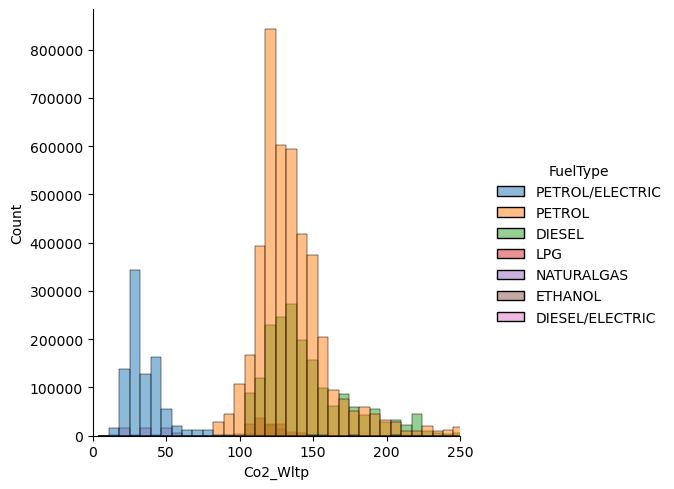

In [100]:
### Distribution des voitures polluantes par type d'energie (2)

sns.displot(x='Co2_Wltp', bins=80, hue='FuelType', kde=False,color='b',alpha=0.5, data=dft)
plt.xlim(0, 250)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

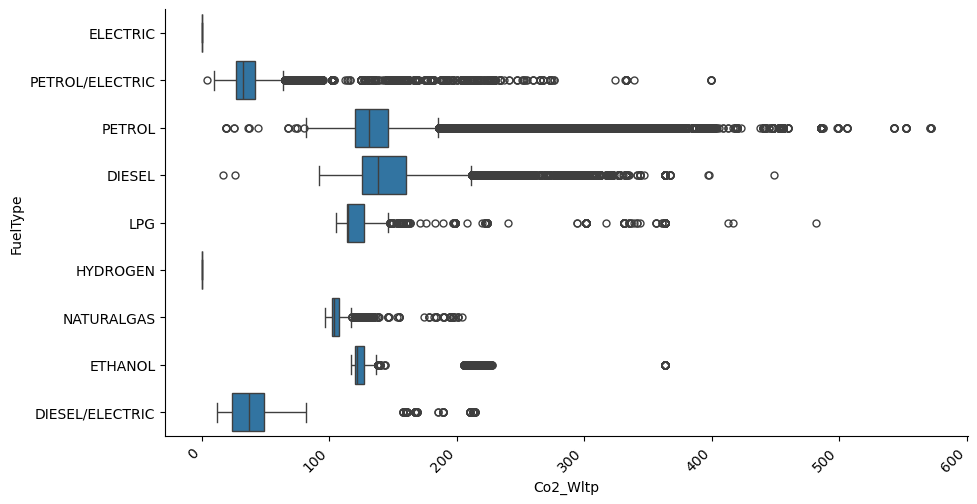

In [104]:
### Distribution des voitures polluantes par type d'energie (3)
sns.catplot(
    data=df,
    y='FuelType',
    x='Co2_Wltp',
    kind='box',
    aspect=2, 
    orient = 'h')
plt.xticks(rotation=45, ha="right" )

